In [20]:
!pip install spotipy


In [14]:
!pip install pandas

In [15]:
#Operaciones matematicas, graficos y visualizacion de datos
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [21]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

In [22]:
client_id = "b94b318bdd6440e48f53f2caadd9e065" # Cambiar por tu Client ID
client_secret = "db2aa700e98c417bbb5aae8530e256d4" # Cambiar por tu Client Secret

# Authentication - sin user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [23]:
results = sp.search(q='Pedro Suárez-Vértiz', limit=1, type='artist')
artist_id = results['artists']['items'][0]['id']
artist_id

'3Azj8v21CQ76AVvjuNv5Vg'

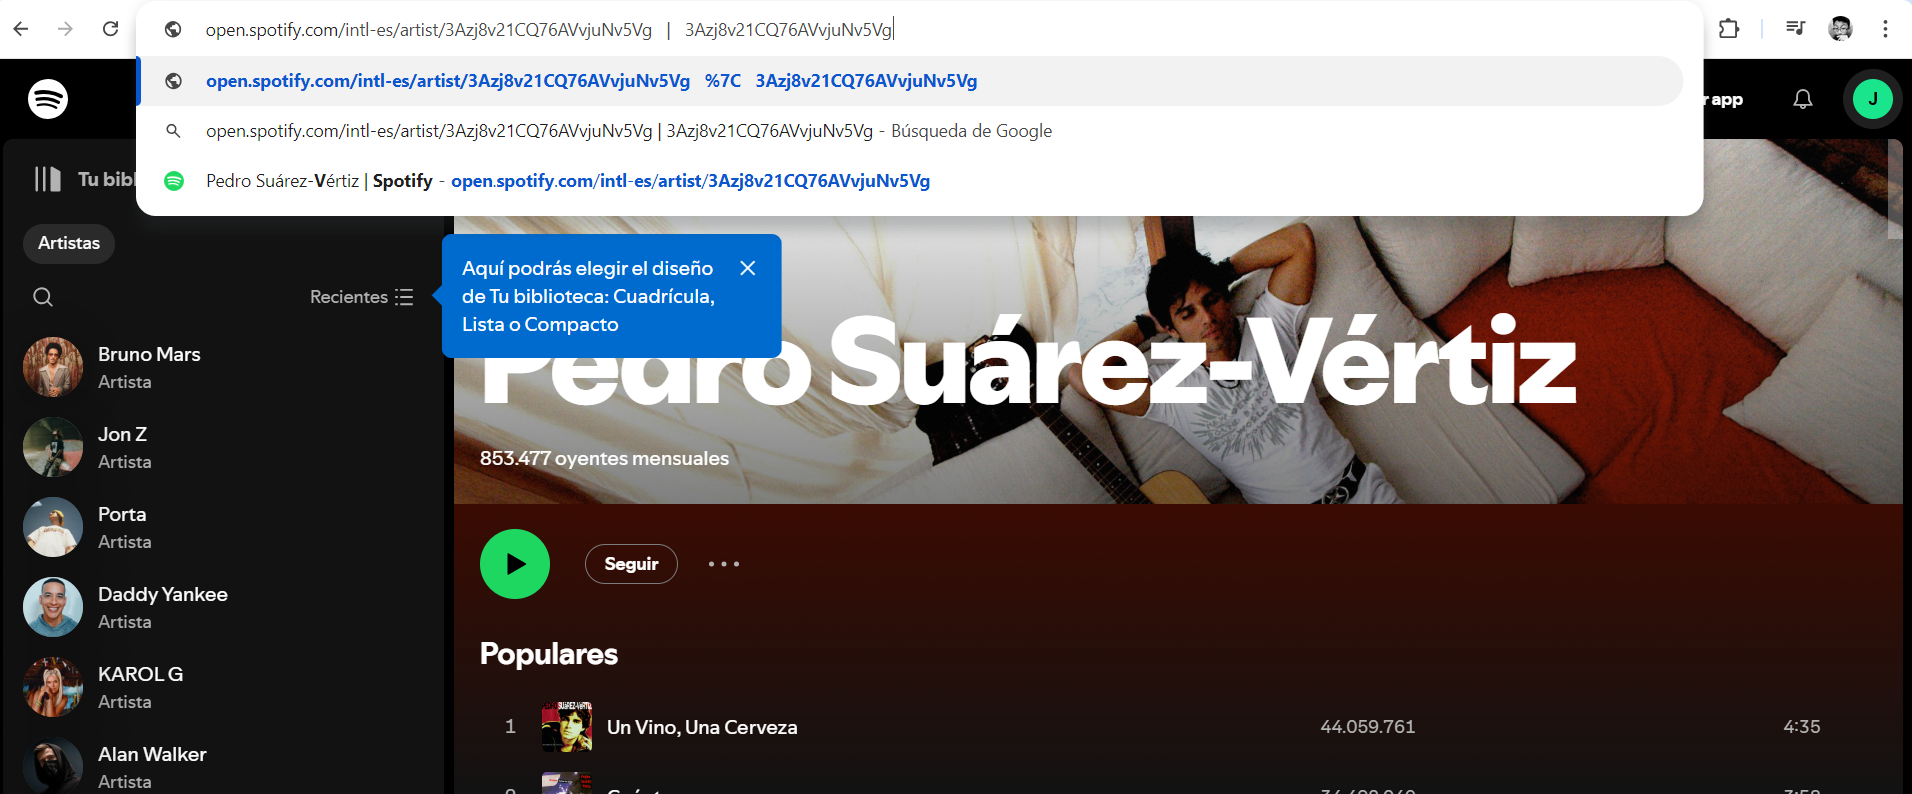

In [24]:
albums = sp.artist_albums(artist_id, album_type='album')
for album in albums['items']:
    print(album['name'])

30 Grandes Éxitos Pedro Suárez-Vertiz
Pedro Suárez Vértiz para Bebés (Vol.1)
Amazonas (Uncut)
Amazonas
Pedro Suárez-Vértiz
Talk Show
Play
Degeneracion Actual
Póntelo en la Lengua
(No Existen) Técnicas para Olvidar


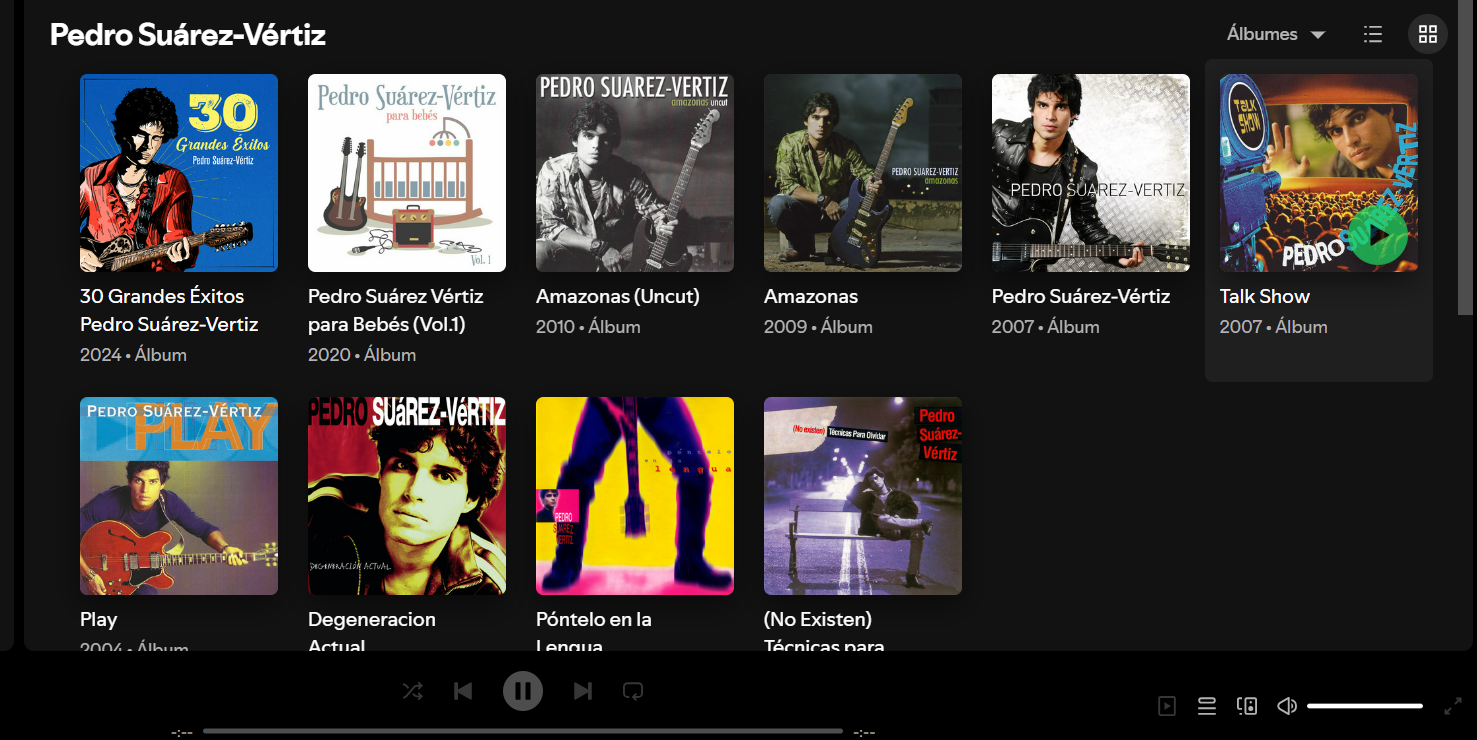

In [25]:
nombre_artista = []
id_artista = []
nombre_cancion = []
id_cancion = []
popularidad_cancion = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, c in enumerate(track_results['tracks']['items']):
        nombre_artista.append(c['artists'][0]['name'])
        id_artista.append(c['artists'][0]['id'])
        nombre_cancion.append(c['name'])
        id_cancion.append(c['id'])
        popularidad_cancion.append(c['popularity'])

In [26]:
track_df = pd.DataFrame({'nombre_artista':nombre_artista, 'nombre_cancion':nombre_cancion, 'id_cancion':id_cancion, 'popularidad_cancion':popularidad_cancion, 'id_artista':id_artista})
print(track_df.shape)
track_df.head()

(1000, 5)


,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista
0,Noah Kahan,Stick Season,0mflMxspEfB0VbI1kyLiAv,89,2RQXRUsr4IW1f3mKyKsy4B
1,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,87,40ZNYROS4zLfyyBSs2PGe2
2,Zach Bryan,Sun to Me,1SjsVdSXpwm1kTdYEHoPIT,84,40ZNYROS4zLfyyBSs2PGe2
3,Djo,End of Beginning,3qhlB30KknSejmIvZZLjOD,92,5p9HO3XC5P3BLxJs5Mtrhm
4,Zach Bryan,Oklahoma Smokeshow,0OWhKvvsHptt6vnnNUSM9a,83,40ZNYROS4zLfyyBSs2PGe2


In [27]:
popularidad_artista = []
generos_artista = []
seguidores_artista = []
for id_a in track_df.id_artista:
  artista = sp.artist(id_a)
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [28]:
track_df = track_df.assign(popularidad_artista=popularidad_artista, generos_artista=generos_artista, seguidores_artista=seguidores_artista)
track_df.head()

,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista,popularidad_artista,generos_artista,seguidores_artista
0,Noah Kahan,Stick Season,0mflMxspEfB0VbI1kyLiAv,89,2RQXRUsr4IW1f3mKyKsy4B,86,"[pov: indie, singer-songwriter pop]",3322433
1,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,87,40ZNYROS4zLfyyBSs2PGe2,91,[classic oklahoma country],4996579
2,Zach Bryan,Sun to Me,1SjsVdSXpwm1kTdYEHoPIT,84,40ZNYROS4zLfyyBSs2PGe2,91,[classic oklahoma country],4996579
3,Djo,End of Beginning,3qhlB30KknSejmIvZZLjOD,92,5p9HO3XC5P3BLxJs5Mtrhm,77,"[pov: indie, psychedelic pop]",1512026
4,Zach Bryan,Oklahoma Smokeshow,0OWhKvvsHptt6vnnNUSM9a,83,40ZNYROS4zLfyyBSs2PGe2,91,[classic oklahoma country],4996579


In [29]:
variables_cancion = []
for id_c in track_df['id_cancion']:
  af = sp.audio_features(id_c)
  variables_cancion.append(af)

In [30]:
print(variables_cancion[0][0].keys())


dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [45]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [57]:
data_list = []

# Revisa el contenido de variables_cancion
for variables in variables_cancion:
    if variables is not None:  # Verificar si no es None
        for var in variables:
            if var is not None:  # Verificar si var no es None
                print(var)  # Esto es para depurar y ver el contenido de var
                data_list.append(var)

# Si la lista no está vacía, convertirla en un DataFrame
if data_list:
    tf_df = pd.DataFrame(data_list, columns=tf_df.columns)

# Ver el DataFrame resultante
print(tf_df)

{'danceability': 0.664, 'energy': 0.5, 'key': 9, 'loudness': -6.935, 'mode': 1, 'speechiness': 0.0651, 'acousticness': 0.799, 'instrumentalness': 0, 'liveness': 0.0966, 'valence': 0.801, 'tempo': 117.896, 'type': 'audio_features', 'id': '0mflMxspEfB0VbI1kyLiAv', 'uri': 'spotify:track:0mflMxspEfB0VbI1kyLiAv', 'track_href': 'https://api.spotify.com/v1/tracks/0mflMxspEfB0VbI1kyLiAv', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0mflMxspEfB0VbI1kyLiAv', 'duration_ms': 182347, 'time_signature': 4}
{'danceability': 0.369, 'energy': 0.192, 'key': 4, 'loudness': -12.151, 'mode': 0, 'speechiness': 0.04, 'acousticness': 0.555, 'instrumentalness': 8.35e-06, 'liveness': 0.0954, 'valence': 0.148, 'tempo': 175.212, 'type': 'audio_features', 'id': '3WMj8moIAXJhHsyLaqIIHI', 'uri': 'spotify:track:3WMj8moIAXJhHsyLaqIIHI', 'track_href': 'https://api.spotify.com/v1/tracks/3WMj8moIAXJhHsyLaqIIHI', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3WMj8moIAXJhHsyLaqIIHI', 'duration_ms

In [58]:
tf_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.664,0.500,9,-6.935,1,0.0651,0.7990,0.000000,0.0966,0.801,117.896,audio_features,0mflMxspEfB0VbI1kyLiAv,spotify:track:0mflMxspEfB0VbI1kyLiAv,https://api.spotify.com/v1/tracks/0mflMxspEfB0...,https://api.spotify.com/v1/audio-analysis/0mfl...,182347,4
1,0.369,0.192,4,-12.151,0,0.0400,0.5550,0.000008,0.0954,0.148,175.212,audio_features,3WMj8moIAXJhHsyLaqIIHI,spotify:track:3WMj8moIAXJhHsyLaqIIHI,https://api.spotify.com/v1/tracks/3WMj8moIAXJh...,https://api.spotify.com/v1/audio-analysis/3WMj...,228013,3
2,0.505,0.270,9,-9.165,0,0.0333,0.5930,0.000000,0.1330,0.557,98.721,audio_features,1SjsVdSXpwm1kTdYEHoPIT,spotify:track:1SjsVdSXpwm1kTdYEHoPIT,https://api.spotify.com/v1/tracks/1SjsVdSXpwm1...,https://api.spotify.com/v1/audio-analysis/1Sjs...,163032,4
3,0.689,0.454,2,-7.643,1,0.0584,0.0351,0.002590,0.0707,0.912,159.982,audio_features,3qhlB30KknSejmIvZZLjOD,spotify:track:3qhlB30KknSejmIvZZLjOD,https://api.spotify.com/v1/tracks/3qhlB30KknSe...,https://api.spotify.com/v1/audio-analysis/3qhl...,159246,4
4,0.544,0.573,8,-5.694,1,0.0356,0.0958,0.000000,0.1040,0.233,122.977,audio_features,0OWhKvvsHptt6vnnNUSM9a,spotify:track:0OWhKvvsHptt6vnnNUSM9a,https://api.spotify.com/v1/tracks/0OWhKvvsHptt...,https://api.spotify.com/v1/audio-analysis/0OWh...,211739,4


In [59]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df = tf_df.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   object
 1   nombre_cancion       1000 non-null   object
 2   id_cancion           1000 non-null   object
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   object
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      989 non-null    float64
 1   energy            989 non-null    float64
 2   loudness          989 non-null    float64
 3   spee

In [ ]:
be continued... 